In [ ]:

import sqlite3

In [ ]:
conn = sqlite3.connect('mydb')
cursor=conn.cursor()

query='''Create table if not exists  employee (
    id Integer primary key,
    name text
) '''

cursor.execute(query)


In [ ]:
cursor.execute("Select * from employee")
res= cursor.fetchall()
print(res)

[(1, 'Abhiram')]


Loggers


In [ ]:
import logging

logging.basicConfig(filename="error.log", level=logging.ERROR)

try:
    x = int(input("Enter number: "))
    print(10 / x)
except Exception as e:
    logging.error("Exception occurred", exc_info=True)


Enter number: 0


ERROR:root:Exception occurred
Traceback (most recent call last):
  File "/tmp/ipython-input-545505319.py", line 7, in <cell line: 0>
    print(10 / x)
          ~~~^~~
ZeroDivisionError: division by zero


In [ ]:
import logging

# Clear existing root logger handlers (important for Colab/Jupyter)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)


logging.basicConfig(
    level=logging.DEBUG,
    datefmt='%H-%M-%S',
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('app.log'),
        logging.StreamHandler()
    ]
)

logger1 = logging.getLogger("Demoo logger")
logger2 = logging.getLogger("exp logger")

def fun(a, b):
    try:
        logger1.debug(f"Dividing {a} and {b}")
        print(a / b)
    except ZeroDivisionError:
      print('cant do this')
      logger2.error("Denominator is Zero")

# Call the function
fun(2, 3)
fun(2,0)


08-53-39 - Demoo logger - DEBUG - Dividing 2 and 3
08-53-39 - Demoo logger - DEBUG - Dividing 2 and 0
08-53-39 - exp logger - ERROR - Denominator is Zero


0.6666666666666666
cant do this


Multi threading


In [ ]:
#Without multithreading
import time

def printNums():
  for i in range(5):
    print(i)
    time.sleep(2)

def printLetters():
  for letter in 'abcde':
    print(letter)
    time.sleep(2)

start_time=time.time()
printNums()
printLetters()
exec_time=time.time()-start_time
print(exec_time)

0
1
2
3
4
a
b
c
d
e
20.00293755531311


In [ ]:
#with multi threading

import threading
import time

def printNums():
  for i in range(5):
    print(i)
    time.sleep(2)

def printLetters():
  for letter in 'abcde':
    print(letter)
    time.sleep(2)

t1=threading.Thread(target=printNums)
t2=threading.Thread(target=printLetters)

t1.start()
t2.start()

t1.join()
t2.join()

start_time=time.time()
exec_time=time.time()-start_time
print(exec_time)

0
a
1
b
2
c
3
d
4
e
4.506111145019531e-05


multi processing


In [ ]:
import multiprocessing
import time

def printNums():
  for i in range(5):
    print(i)
    time.sleep(2)

def printLetters():
  for letter in 'abcde':
    print(letter)
    time.sleep(2)

p1=multiprocessing.Process(target=printLetters)
p2=multiprocessing.Process(target=printNums)

p1.start()
p2.start()

p1.join()
p2.join()

start_time=time.time()
exec_time=time.time()- start_time
print(exec_time)

a
0
b
1
c
2
d
3
e
4
9.083747863769531e-05


In [ ]:
import requests
from bs4 import BeautifulSoup

# Sample payload (replace with actual field names expected by the login form)
payload = {
    'UserName': '160123737201',
    'Password': '160123737201'  # likely needed
}

# Use a session to maintain cookies
session = requests.Session()

# Send POST request
response = session.post('https://erp.cbit.org.in', data=payload)

# Parse the response
soup = BeautifulSoup(response.url, 'html.parser')

# Print title to see if it worked
print(soup.title)


10-38-54 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): erp.cbit.org.in:443
10-38-54 - urllib3.connectionpool - DEBUG - https://erp.cbit.org.in:443 "POST / HTTP/1.1" 200 None


None


/tmp/ipython-input-3174456881.py:17: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  soup = BeautifulSoup(response.url, 'html.parser')


In [ ]:
class A:
  def __del__(self):
    print("deleted object",self)

a=A()

del a

deleted object <__main__.A object at 0x7cd880ef57c0>


In [ ]:
import gc

print(gc.collect())
print(gc.garbage)
print(gc.get_objects())

print(gc.get_count)

FLASK

In [ ]:
#bassic skeleton

from flask import Flask
app=Flask(__name__)

if __name__ == '__main__':
  app.run(Debug='True') ##This is used to avoid restarting the server

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 119.3 MB/s eta 0:00:00


Streamlit


In [ ]:
import streamlit as st
import pandas as pd


st.title("Title this is !!")
st.write("Hello there")
st.write(pd.DataFrame({'a':[1,2,3],'b':[10,20,30]}))

name=st.text_input("Enter your name")
st.write(f"Your name is {name}")

age=st.slider("Enter your age",0,100,18)
st.write("your age is ",age)

options=['a','b','c']

option =st.selectbox("Choose an option below",options)

file=st.file_uploader("Submit your file here",type="jpg")
if file:
    st.write(file)


ModuleNotFoundError: No module named 'streamlit'

# Feature Engineering

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64




<Axes: xlabel='age', ylabel='Count'>

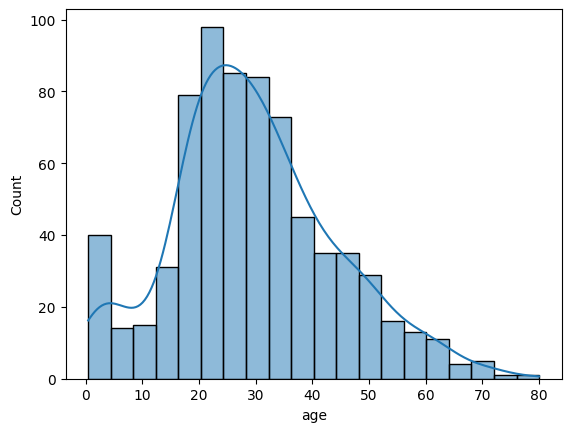

In [13]:
#Handling missing values
#CSAR, CAR, CNAR --> MEchanisms

import seaborn as sns

df=sns.load_dataset('titanic')

print(df.isnull().sum())
print()
print()
sns.histplot(df['age'],kde=True)



In [26]:
#Imputation techniques

#1 --> Mean Imputation

df['age_mean']=df['age'].fillna(df['age'].mean())
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [27]:
#Median --> Used in case of outliers

df['age_median']=df['age'].fillna(df['age'].median())
df[['age','age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [29]:
#Mode is used for categorical values

df[df['embarked'].isnull()]
print(df['embarked'].unique())

['S' 'C' 'Q' nan]


In [31]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode']=df['embarked'].fillna(mode_value)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C
